In [2]:
from pathlib import Path
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_path = Path(
    "datasets/newsgroups/data"
)
data_path.mkdir(parents=True, exist_ok=True)

docs = fetch_20newsgroups(
    data_home=str(data_path), subset="all", remove=("headers", "footers", "quotes")
)

In [4]:
def remove_linebreaks(text: str) -> str:
    """Remove line breaks from text."""
    return " ".join(text.splitlines()).strip()

In [5]:
data = [remove_linebreaks(x) for x in docs.data]  # type: ignore
label_names = docs.target_names  # type: ignore
labels = docs.target  # type: ignore
labels = [label_names[label] for label in labels.tolist()]

In [6]:
X_train_full, X_eval, y_train_full, y_eval = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

In [ ]:
train_df = pd.DataFrame({"text": X_train_full, "topic": y_train_full})
test_df = pd.DataFrame({"text": X_eval, "topic": y_eval})

In [8]:
def plot_column_distribution(dataframe, column_name):
    """
    Plots the distribution of a specified column in the DataFrame.
    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dataframe, x=column_name, order=dataframe[column_name].value_counts().index)
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

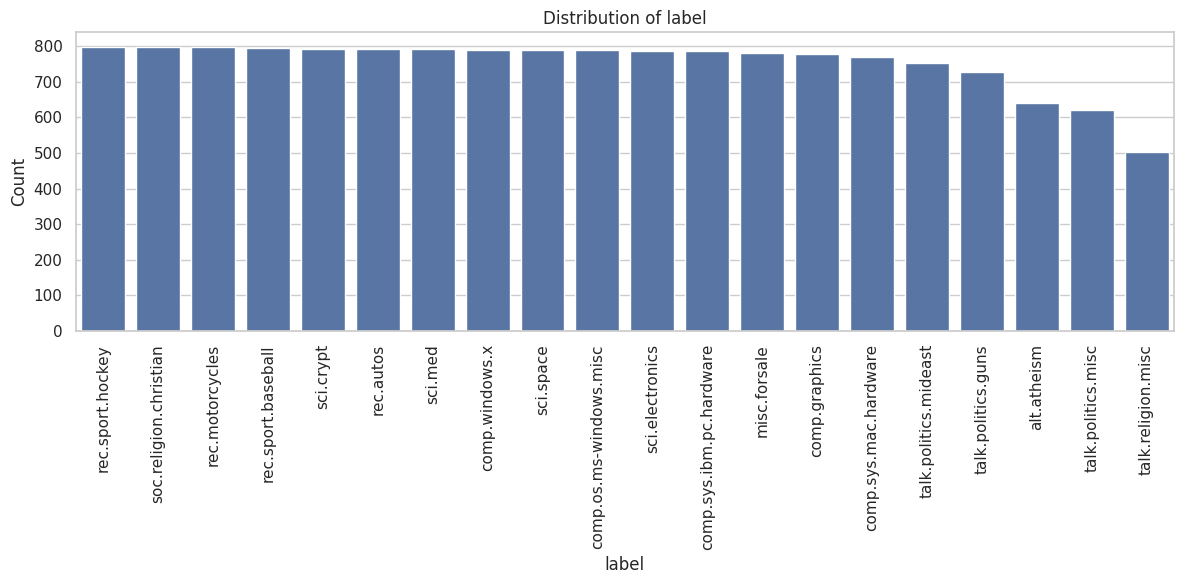

In [ ]:
plot_column_distribution(train_df, "topic")

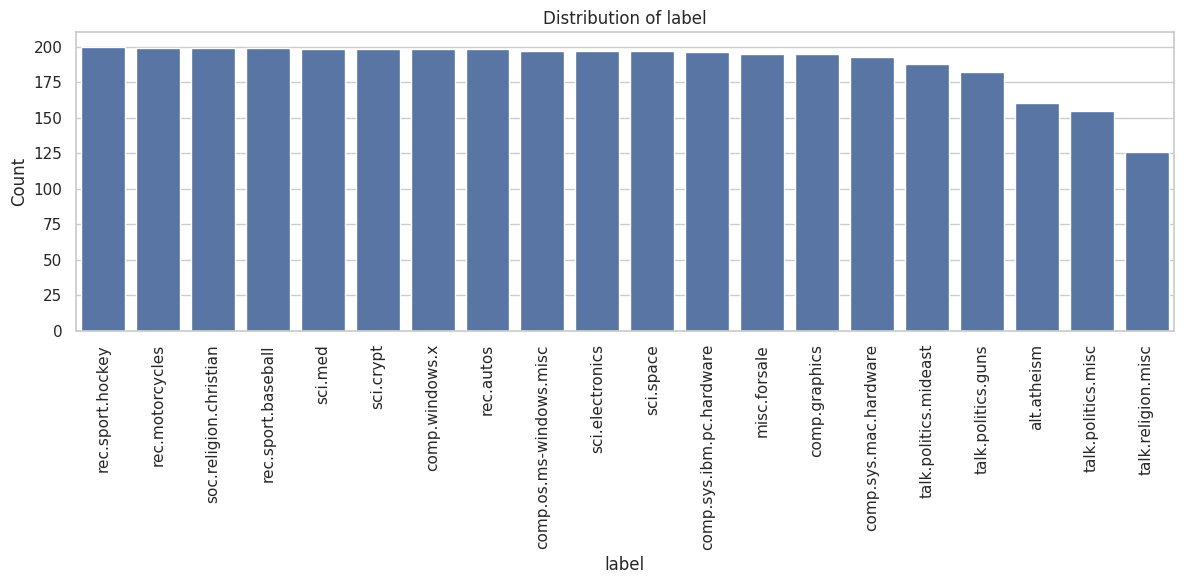

In [ ]:
plot_column_distribution(test_df, "topic")

In [ ]:
# store train and eval dataframes as csv files
train_df.to_parquet(data_path / "newsgroups_train.parquet", index=False)
test_df.to_parquet(data_path / "newsgroups_test.parquet", index=False)

In [13]:
# Print some statistics about the DataFrame

# length of the dataframe
print(f"Number of rows in the test DataFrame: {len(test_df)}")
print(f"Number of rows in the train DataFrame: {len(train_df)}")


# number of unique labels
print(f"Number of unique labels: {test_df['label'].nunique()}")

Number of rows in the test DataFrame: 3770
Number of rows in the train DataFrame: 15076
Number of unique labels: 20
